In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

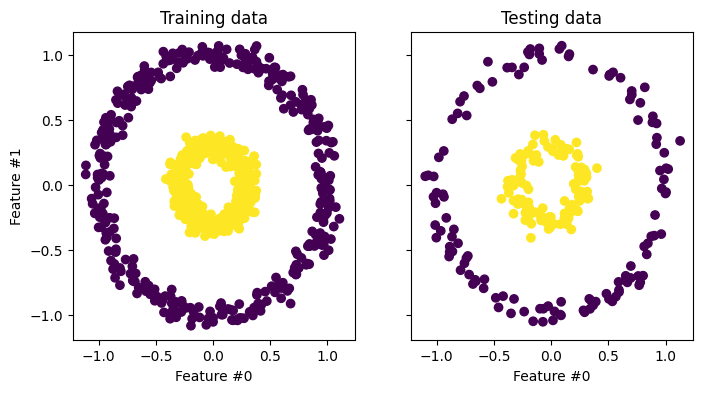

In [2]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [3]:
# Test performance with hidden layer using ReLU as activation function.
model = Sequential([
    Input(shape=(2,)),
    Dense(5, "relu"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1113 - acc: 1.0000


[0.11126542836427689, 1.0]

In [4]:
# Test performance with hidden layer using Sigmoid as activation function.
model = Sequential([
    Input(shape=(2,)),
    Dense(5, "sigmoid"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.6941 - acc: 0.5600


[0.6940987706184387, 0.5600000023841858]

In [5]:
# Test performance with hidden layer using Sigmoid as activation function (Adding 2 additional layers)
model = Sequential([
    Input(shape=(2,)),
    Dense(5, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.6935 - acc: 0.3560


[0.6935056447982788, 0.35600000619888306]

In [6]:
# Illustrate weights across epochs
class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)

def make_mlp(activation_layer):
    "Create a model with specified activation and initalizer"
    output_layer = "sigmoid"
    model = Sequential([
        Input(shape=(2,)),
        Dense(5, activation=activation_layer, kernel_initializer=RandomNormal(mean=0, stddev=1), name=activation_layer +"1"),
        Dense(5, activation=activation_layer, kernel_initializer=RandomNormal(mean=0, stddev=1), name=activation_layer +"2"),
        Dense(5, activation=activation_layer, kernel_initializer=RandomNormal(mean=0, stddev=1), name=activation_layer +"3"),
        Dense(5, activation=activation_layer, kernel_initializer=RandomNormal(mean=0, stddev=1), name=activation_layer +"4"),
        Dense(1, activation=output_layer, kernel_initializer=RandomNormal(mean=0, stddev=1), name=output_layer + "5")
    ])
    return model

def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
    ax[0].set_title("Mean Weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("Standard Deviation")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

In [7]:
batch_size = 32
n_epochs = 100

Before training: Accuracy 0.5
After training: Accuracy 0.897
32/32 [==============================] - 0s 1ms/step - loss: 0.4527 - acc: 0.8970
[0.45265257358551025, 0.8970000147819519]


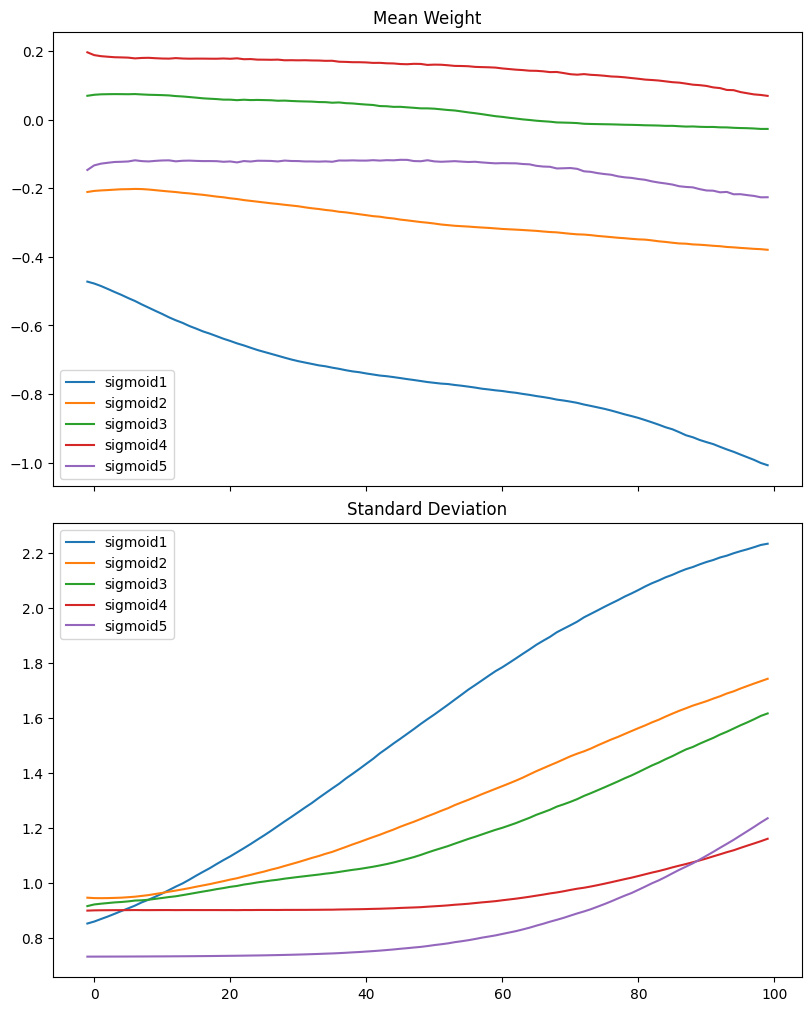

In [8]:
# Sigmoid activation
model = make_mlp("sigmoid")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)

Before training: Accuracy 0.5
After training: Accuracy 1.0
32/32 [==============================] - 0s 1ms/step - loss: 5.8569e-07 - acc: 1.0000
[5.856922484781535e-07, 1.0]


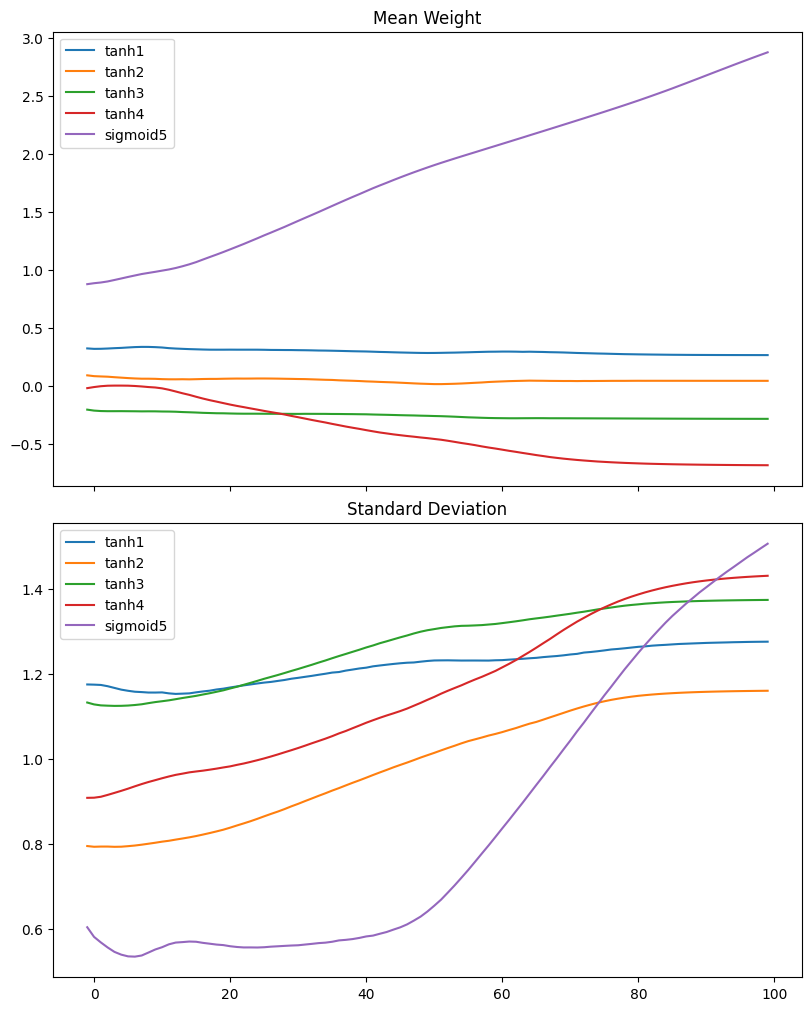

In [9]:
# tanh activation
model = make_mlp("tanh")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)

Before training: Accuracy 0.5
After training: Accuracy 1.0
32/32 [==============================] - 0s 920us/step - loss: 3.1298e-07 - acc: 1.0000
[3.1298017688641266e-07, 1.0]


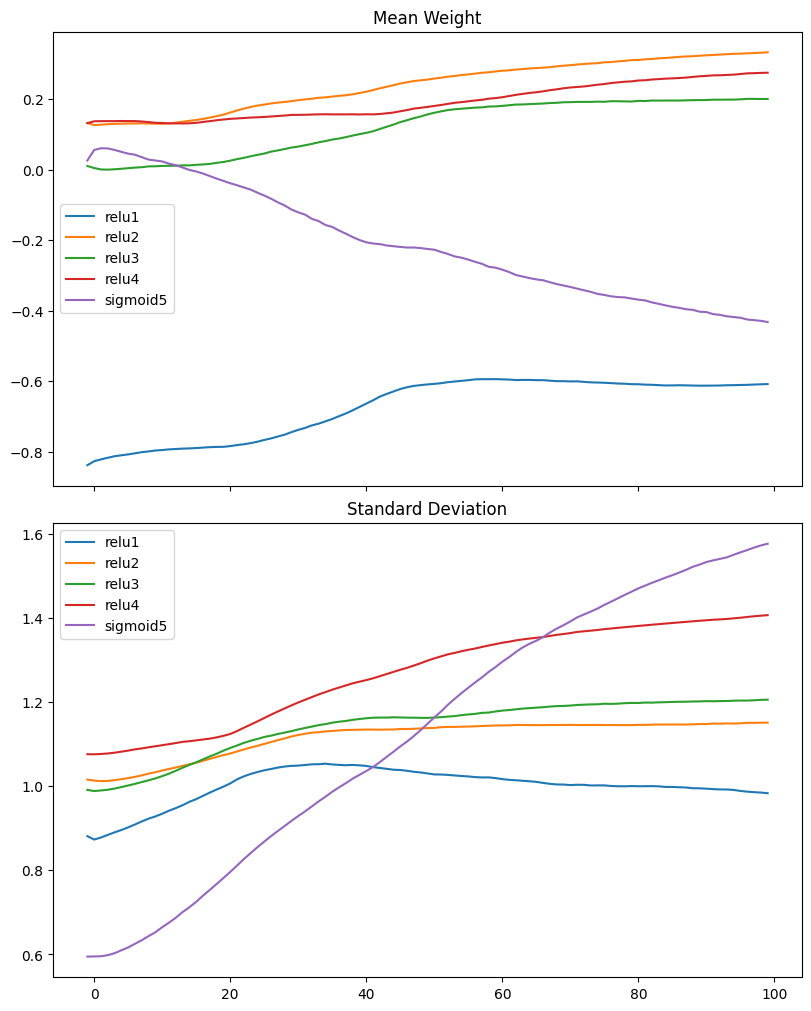

In [10]:
# relu activation
model = make_mlp("relu")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)

In [11]:
# Show gradient across epochs
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.BinaryCrossentropy()

def train_model(X, y, model, n_epochs=n_epochs, batch_size=batch_size):
    "Run training loop manually"
    train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    gradhistory = []
    losshistory = []
    def recordweight():
        data = {}
        for g,w in zip(grads, model.trainable_weights):
            if '/kernel:' not in w.name:
                continue # skip bias
            name = w.name.split("/")[0]
            data[name] = g.numpy()
        gradhistory.append(data)
        losshistory.append(loss_value.numpy())
    for epoch in range(n_epochs):
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            if step == 0:
                recordweight()
    # After all epochs, record again
    recordweight()
    return gradhistory, losshistory

def plot_gradient(gradhistory, losshistory):
    "Plot gradient mean and sd across epochs"
    fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(8, 12))
    ax[0].set_title("Mean gradient")
    for key in gradhistory[0]:
        ax[0].plot(range(len(gradhistory)), [w[key].mean() for w in gradhistory], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in gradhistory[0]:
        ax[1].semilogy(range(len(gradhistory)), [w[key].std() for w in gradhistory], label=key)
    ax[1].legend()
    ax[2].set_title("Loss")
    ax[2].plot(range(len(losshistory)), losshistory)
    plt.show()

In [12]:
model = make_mlp("sigmoid", initializer, "sigmoid")
print("Before training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("After training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)

NameError: name 'initializer' is not defined

In [ ]:
model = make_mlp("tanh", initializer, "tanh")
print("Before training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("After training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)

In [ ]:
model = make_mlp("relu", initializer, "relu")
print("Before training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("After training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)